## House Prices: Advanced Regression Techniques

### Goal of the Project

Predict the price of a house by its features. If you are a buyer or seller of the house but you don’t know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data set

In [182]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print("Train data shape", train_df.shape)
print("Test data shape", test_df.shape)

Train data shape (1460, 81)
Test data shape (1459, 80)



### Check Data sample
#### It shows the target variable sales price is missing from the test data

In [184]:
train_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
898  899          20       RL        100.0    12919   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      NridgHt       Norm       Norm     1Fam     1Story            9            5       2009          2010       Hip  CompShg     VinylSd     VinylSd      Stone       760.0        Ex        TA      PConc       Ex       TA           Gd          GLQ        2188          Unf           0        142         2330    GasA        Ex          Y      SBrkr      2364         0             0       2364             1             0         2         1             2             1          Ex            11        Typ           2          Gd     Attchd       2009.0          Fin           3         820         TA         TA          Y           0           67              0          0            0         0    NaN   NaN         NaN        0       3    2010      New       Partial     611657
644  645          20       FV         85.0     9187   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story            9            5       2009          2009     Gable  CompShg     CemntBd     CmentBd      Stone       162.0        Ex        TA      PConc       Ex       TA           Mn          GLQ        1121          Unf           0        645         1766    GasA        Ex          Y      SBrkr      1766         0             0       1766             1             0         2         1             2             1          Ex             7        Typ           1          Gd     Attchd       2009.0          Fin           3         478         TA         TA          Y         195          130              0          0            0         0    NaN   NaN         NaN        0      10    2009      New       Partial     370878
87    88         160       FV         40.0     3951   Pave  Pave      Reg         Lvl    AllPub    Corner       Gtl      Somerst       Norm       Norm   TwnhsE     2Story            6            5       2009          2009     Gable  CompShg     VinylSd     VinylSd      Stone        76.0        Gd        TA      PConc       Gd       TA           Av          Unf           0          Unf           0        612          612    GasA        Ex          Y      SBrkr       612       612             0       1224             0             0         2         1             2             1          Gd             4        Typ           0         NaN     Detchd       2009.0          RFn           2         528         TA         TA          Y           0          234              0          0            0         0    NaN   NaN         NaN        0       6    2009      New       Partial     164500
145  146         160       RM         24.0     2522   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards       Norm       Norm    Twnhs     2Story            6            5       2004          2006     Gable  CompShg     VinylSd     VinylSd      Stone        50.0        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        970    

In [185]:
test_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
1340  2801          30       RM         60.0     7200   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl       IDOTRR       Norm       Norm     1Fam     1Story            6            6       1930          1950     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     BrkTil       TA       TA           No          LwQ       343.0          Unf         0.0      641.0        984.0    GasA        TA          Y      FuseF       984         0             0        984           0.0           0.0         1         0             3             1          TA             6        Typ           0         NaN     Detchd       1930.0          Unf         1.0       308.0         TA         TA          N           0            0            164          0            0         0    NaN    NaN         NaN        0       3    2006    ConLI        Family
1136  2597          20       RL          NaN     7777   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl       Timber       Norm       Norm     1Fam     1Story            6            5       1996          1996     Gable  CompShg     VinylSd     VinylSd    BrkFace       203.0        Gd        TA      PConc       Ex       TA           No          Unf         0.0          Unf         0.0     1491.0       1491.0    GasA        Ex          Y      SBrkr      1491         0             0       1491           0.0           0.0         2         0             3             1          TA             7        Typ           1          TA     Attchd       1996.0          Fin         2.0       571.0         TA         TA          Y           0           35              0          0            0         0    NaN    NaN         NaN        0      11    2007       WD        Normal
6     1467          20       RL          NaN     7980   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     1Story            6            7       1992          2007     Gable  CompShg     HdBoard     HdBoard       None         0.0        TA        Gd      PConc       Gd       TA           No          ALQ       935.0          Unf         0.0      233.0       1168.0    GasA        Ex          Y      SBrkr      1187         0             0       1187           1.0           0.0         2         0             3             1          TA             6        Typ           0         NaN     Attchd       1992.0          Fin         2.0       420.0         TA         TA          Y         483           21              0          0            0         0    NaN  GdPrv        Shed      500       3    2010       WD        Normal
763   2224          60       RL          NaN    11050   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     2Story            7            5       1996          1997     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           Mn          Unf         0.0          Unf         0.0      910.0        910.0    GasA        Ex     

## Increase the pandas option

In [186]:
pd.set_option('display.max_rows', 2100)
pd.set_option('display.max_columns', 90)
pd.set_option('display.width', 1000)

### Check for null values

In [187]:
train_df_null_values = train_df.isnull().sum().to_frame("Train data Set Null Values")
test_df_null_values = test_df.isnull().sum().to_frame("Test Data Set Null Values")

### Join the train and test data set to check for null values across different features

In [188]:
train_test_null_values = pd.concat([train_df_null_values, test_df_null_values], axis = 1, join = 'outer', sort = False)
train_test_null_values

Train data Set Null Values  Test Data Set Null Values
Id                                      0                        0.0
MSSubClass                              0                        0.0
MSZoning                                0                        4.0
LotFrontage                           259                      227.0
LotArea                                 0                        0.0
Street                                  0                        0.0
Alley                                1369                     1352.0
LotShape                                0                        0.0
LandContour                             0                        0.0
Utilities                               0                        2.0
LotConfig                               0                        0.0
LandSlope                               0                        0.0
Neighborhood                            0                        0.0
Condition1                              0                        0.0
Condition2                              0                        0.0
BldgType                                0                        0.0
HouseStyle                              0                        0.0
OverallQual                             0                        0.0
OverallCond                             0                        0.0
YearBuilt                               0                        0.0
YearRemodAdd                            0                        0.0
RoofStyle                               0                        0.0
RoofMatl                                0                        0.0
Exterior1st                             0                        1.0
Exterior2nd                             0                        1.0
MasVnrType                              8                       16.0
MasVnrArea                              8                       15.0
ExterQual                               0                        0.0
ExterCond                               0                        0.0
Foundation                              0                        0.0
BsmtQual                               37                       44.0
BsmtCond                               37                       45.0
BsmtExposure                           38                       44.0
BsmtFinType1                           37                       42.0
BsmtFinSF1                              0                        1.0
BsmtFinType2                           38                       42.0
BsmtFinSF2                              0                        1.0
BsmtUnfSF                               0                        1.0
TotalBsmtSF                             0                        1.0
Heating                                 0                        0.0
HeatingQC                               0                        0.0
CentralAir                              0                        0.0
Electrical                              1                        0.0
1stFlrSF                                0                        0.0
2ndFlrSF                                0                        0.0
LowQualFinSF                            0                        0.0
GrLivArea                               0                        0.0
BsmtFullBath                            0                        2.0
BsmtHalfBath                            0                        2.0
FullBath                                0                        0.0
HalfBath                                0                        0.0
BedroomAbvGr                            0                        0.0
KitchenAbvGr                            0                        0.0
KitchenQual                             0                        1.0
TotRmsAbvGrd                            0                        0.0
Functional                              0                        2.0
Fireplaces                              0                        0.0
FireplaceQu  

### Check for features where null values are present in test dataset but not in train dataset 

In [189]:
def check_test_null_train_not_null(train_test_null_values):
    
for (index_label, row_series) in train_test_null_values.iterrows():
    if(row_series["Train data Set Null Values"])
    print('Test Feature having null with no train feature null', index_label)
    print('Test Feature value having null with no train feature null : ', row_series.values)

IndentationError: expected an indented block (<ipython-input-189-fb7a4668134d>, line 3)

In [190]:
train_test_null_values.loc[train_test_null_values["Train data Set Null Values"] - train_test_null_values['Test Data Set Null Values'] > 0]

Train data Set Null Values  Test Data Set Null Values
LotFrontage                          259                      227.0
Alley                               1369                     1352.0
Electrical                             1                        0.0
GarageType                            81                       76.0
GarageYrBlt                           81                       78.0
GarageFinish                          81                       78.0
GarageQual                            81                       78.0
GarageCond                            81                       78.0
Fence                               1179                     1169.0

### Combine the train and test dataframe for feature enginering

In [222]:
## concat train and test
combined_df = pd.concat((train_df, test_df), sort = True)
temp_df = df
print("Shape of df: ", combined_df.shape)

Shape of df:  (2919, 81)


In [212]:
combined_df.sample(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
864      1525         0          0   NaN             3     1Fam       TA           Av         0.0         0.0          Unf          Unf           0.0           0.0       Gd     1510.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd   NaN          Gd           1      PConc         2        Typ       534.0         2.0         TA          RFn         TA     Attchd       2006.0       1525         1    GasA        Ex     1Story  2325             1          Gd         Lvl       Gtl    10936    Inside         59.0      IR1             0          20       RL         0.0       None         NaN        0       4      Gilbert           18            5            7          Y         0    NaN  CompShg     Gable       Partial        NaN      New            0   Pave             6       1510.0    AllPub         100       2006          2006    2007
408      1071      1101          0   NaN             3     1Fam       Gd           No         0.0         0.0          Unf          Unf           0.0           0.0       Ex     1063.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd   NaN          Gd           1      PConc         2        Typ       947.0         3.0         TA          RFn         TA     Attchd       2006.0       2172         1    GasA        Ex     2Story   409             1          Gd         Lvl       Gtl    14154    Corner        109.0      Reg             0          60       RL       350.0    BrkFace         NaN        0       8      NridgHt           62            5            7          Y         0    NaN  CompShg     Gable       Partial   280000.0      New            0   Pave             9       1063.0    AllPub         192       2006          2006    2007
742       819       784          0   NaN             4     1Fam       TA           No         0.0         0.0          Unf          Unf           0.0           0.0       TA      784.0          Y       Norm       Norm      SBrkr              0        TA        TA     Wd Sdng     Plywood   NaN          Gd           1     BrkTil         1        Typ       599.0         2.0         TA          Unf         TA     Attchd       1980.0       1603         0    GasA        TA     2Story  2203             1          TA         HLS       Gtl     9650    Corner          NaN      IR1             0          70       RL         0.0       None         NaN        0       6      Crawfor          217            3            6          Y         0    NaN  CompShg       Hip        Normal        NaN       WD            0   Pave             7        784.0    AllPub           0       1923          1950    2008
689      1524         0          0   NaN             3     1Fam       TA           Gd       599.0         0.0          GLQ          Unf           1.0           0.0       Gd      925.0          Y       Norm       Norm      SBrkr              0        TA        TA     Plywood     Plywood   NaN          Gd           2     CBlock         2        Typ       478.0         2.0         TA          Fin         TA  

## Exploratory Data Analysis (EDA)

In [194]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

In [195]:
combined_df.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1   BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch   Fireplaces     FullBath   GarageArea   GarageCars  GarageYrBlt    GrLivArea     HalfBath           Id  KitchenAbvGr        LotArea  LotFrontage  LowQualFinSF   MSSubClass   MasVnrArea       MiscVal       MoSold  OpenPorchSF  OverallCond  OverallQual     PoolArea      SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd       YrSold
count  2919.000000  2919.000000  2919.000000   2919.000000  2918.000000  2918.000000   2917.000000   2917.000000  2918.000000    2919.000000  2919.000000  2919.000000  2918.000000  2918.000000  2760.000000  2919.000000  2919.000000  2919.000000   2919.000000    2919.000000  2433.000000   2919.000000  2919.000000  2896.000000   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000    1460.000000  2919.000000   2919.000000  2918.000000  2919.000000  2919.000000   2919.000000  2919.000000
mean   1159.581706   336.483727     2.602261      2.860226   441.423235    49.582248      0.429894      0.061364   560.772104      23.098321     0.597122     1.568003   472.874572     1.766621  1978.113406  1500.759849     0.380267  1460.000000      1.044536   10168.114080    69.305795      4.694416    57.137718   102.201312     50.825968     6.213087    47.486811     5.564577     6.089072     2.251799  180921.195890    16.062350      6.451524  1051.777587    93.709832  1971.312778   1984.264474  2007.792737
std     392.362079   428.701456    25.188169      0.822693   455.610826   169.205611      0.524736      0.245687   439.543659      64.244246     0.646129     0.552969   215.394815     0.761624    25.574285   506.051045     0.502872   842.787043      0.214462    7886.996359    23.344905     46.396825    42.517628   179.334253    567.402211     2.714762    67.575493     1.113131     1.409947    35.663946   79442.502883    56.184365      1.569379   440.766258   126.526589    30.291442     20.894344     1.314964
min     334.000000     0.000000     0.000000      0.000000     0.000000     0.000000      0.000000      0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     0.000000  1895.000000   334.000000     0.000000     1.000000      0.000000    1300.000000    21.000000      0.000000    20.000000     0.000000      0.000000     1.000000     0.000000     1.000000     1.000000     0.000000   34900.000000     0.000000      2.000000     0.000000     0.000000  1872.000000   1950.000000  2006.000000
25%     876.000000     0.000000     0.000000      2.000000     0.000000     0.000000      0.000000      0.000000   220.000000       0.000000     0.000000     1.000000   320.000000     1.000000  1960.000000  1126.000000     0.000000   730.500000      1.000000    7478.000000    59.000000      0.000000    20.000000     0.000000      0.000000     4.000000     0.000000     5.000000     5.000000     0.000000  129975.000000     0.000000      5.000000   793.000000     0.000000  1953.500000   1965.000000  2007.000000
50%    1082.000000     0.000000     0.000000      3.000000   368.500000     0.000000      0.000000      0.000000   467.000000       0.000000     1.000000     2.000000   480.000000     2.000000  1979.000000  1444.000000     0.000000  1460.000000      1.000000    9453.000000    68.000000      0.000000    50.000000     0.000000      0.000000     6.000000    26.000000     5.000000     6.000000     0.000000  163000.000000     0.000000      6.000000   989.500000     0.000000  1973.000000   1993.000000  2008.000000
75%    1387.500000   704.000000     0.000000      3.000000   733.000000     0.000000      1.000000      0.000000   805.500000       0.000000     1.000000     2.000000   576.000000     2.000000  2002.000000  1743.500000     1.000000  2189.500000      1.000000   11570.000000    80.000000      0.000000    70.000000   164.000000      0.000000     8.000000    70.000000     6.000000     7.000000     0.000000  21400

### Check for numeric vs categorical features

In [196]:
combined_df.select_dtypes(include=['int64', 'float64']).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype='object')

In [197]:
combined_df.select_dtypes(include=['object']).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'], dtype='object')

### Set Index as ID column

In [198]:
combined_df.set_index('Id')

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1          856       854          0   NaN             3     1Fam       TA           No       706.0         0.0          GLQ          Unf           1.0           0.0       Gd      150.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NaN         NaN           0      PConc         2        Typ       548.0         2.0         TA          RFn         TA     Attchd       2003.0       1710         1    GasA        Ex     2Story             1          Gd         Lvl       Gtl     8450    Inside         65.0      Reg             0          60       RL       196.0    BrkFace         NaN        0       2      CollgCr           61            5            7          Y         0    NaN  CompShg     Gable        Normal   208500.0       WD            0   Pave             8        856.0    AllPub           0       2003          2003    2008
2         1262         0          0   NaN             3     1Fam       TA           Gd       978.0         0.0          ALQ          Unf           0.0           1.0       Gd      284.0          Y      Feedr       Norm      SBrkr              0        TA        TA     MetalSd     MetalSd    NaN          TA           1     CBlock         2        Typ       460.0         2.0         TA          RFn         TA     Attchd       1976.0       1262         0    GasA        Ex     1Story             1          TA         Lvl       Gtl     9600       FR2         80.0      Reg             0          20       RL         0.0       None         NaN        0       5      Veenker            0            8            6          Y         0    NaN  CompShg     Gable        Normal   181500.0       WD            0   Pave             6       1262.0    AllPub         298       1976          1976    2007
3          920       866          0   NaN             3     1Fam       TA           Mn       486.0         0.0          GLQ          Unf           1.0           0.0       Gd      434.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NaN          TA           1      PConc         2        Typ       608.0         2.0         TA          RFn         TA     Attchd      

In [199]:
combined_df.sample(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
570       1728         0          0   NaN             6   Duplex       TA           No       231.0         0.0          LwQ          Unf           0.0           0.0       TA     1497.0          Y       Norm       Norm      SBrkr              0        TA        TA     HdBoard     HdBoard   NaN         NaN           0     CBlock         2        Typ       576.0         2.0         TA          Unf         TA     Detchd       1987.0       1728         0    GasA        TA     1Story   571             2          TA         Lvl       Gtl    13101    Inside         74.0      IR1             0          90       RL       108.0    BrkFace         NaN        0      11        NAmes            0            5            5          Y         0    NaN  CompShg     Gable        Normal   142600.0       WD            0   Pave            10       1728.0    AllPub           0       1965          1965    2008
14        1253         0          0   NaN             2     1Fam       TA           No       733.0         0.0          BLQ          Unf           1.0           0.0       TA      520.0          Y       Norm       Norm      SBrkr            176        TA        TA     MetalSd     MetalSd  GdWo          Fa           1     CBlock         1        Typ       352.0         1.0         TA          RFn         TA     Attchd       1960.0       1253         1    GasA        TA     1Story    15             1          TA         Lvl       Gtl    10920    Corner          NaN      IR1             0          20       RL       212.0    BrkFace         NaN        0       5        NAmes          213            5            6          Y         0    NaN  CompShg       Hip        Normal   157000.0       WD            0   Pave             5       1253.0    AllPub           0       1960          1960    2008
521       1342         0          0   NaN             2   TwnhsE       TA           No       846.0         0.0          GLQ          Unf           1.0           0.0       Gd      496.0          Y       Norm       Norm      SBrkr              0        TA        Gd     MetalSd     MetalSd   NaN          Gd           1      PConc         2        Typ       550.0         2.0         TA          Fin         TA     Attchd       2007.0       1342         0    GasA        Ex     1Story  1982             1          Gd         Lvl       Gtl     6240    Inside         48.0      Reg             0         120       RL       176.0    BrkFace         NaN        0       6      NridgHt           35            5            8          Y         0    NaN  CompShg       Hip        Normal        NaN       WD            0   Pave             6       1342.0    AllPub           0       2006          2007    2008
1294       864         0          0   NaN             2     1Fam       TA           No       167.0         0.0          Rec          Unf           1.0           0.0       TA      697.0          Y       Norm       Norm      SBrkr              0        TA        TA     WdShing     Plywood   NaN         NaN           0     CBlock         1        Typ       572.0         2.0         TA          Unf         

### Show the null values using heatmap

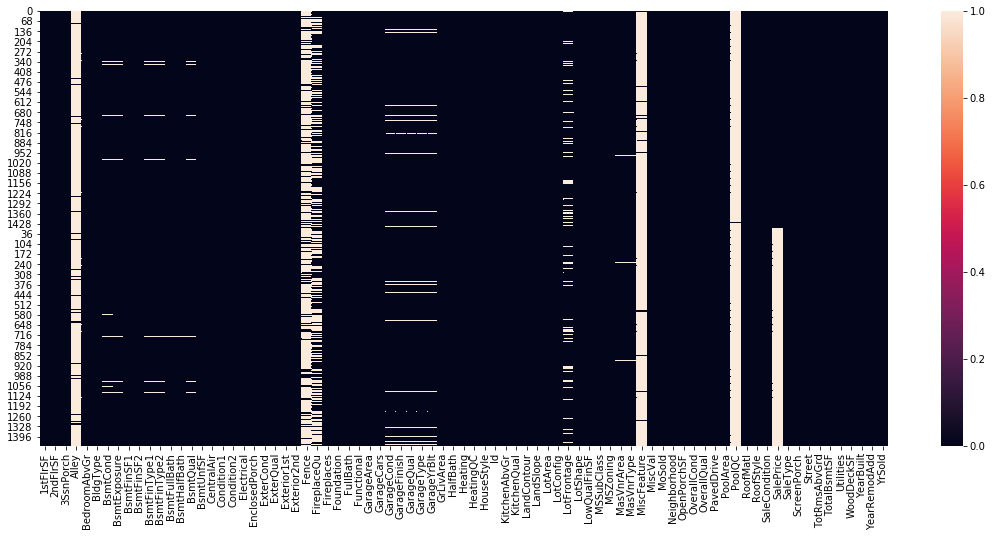

In [200]:
plt.figure(figsize=(19,8))
sns.heatmap(combined_df.isnull())

#### Get the percentages of null value


In [201]:
null_percent = combined_df.isnull().sum()/combined_df.shape[0]*100
null_percent

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageType        5.378554
G

### Drop columns for columns greater than 20 percent

In [214]:
col_to_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it
col_to_drop

Index(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'SalePrice'], dtype='object')

In [223]:
combined_df = combined_df.drop(col_to_drop, "columns")
combined_df.shape

(2919, 75)

In [224]:
combined_df.sample(2)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea RoofMatl RoofStyle SaleCondition SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
1020      1040         0          0             3     1Fam       TA           Av       249.0       761.0          Rec          BLQ           1.0           0.0       TA       30.0          Y       Norm       Norm      SBrkr              0        TA        TA     HdBoard     HdBoard           0     CBlock         1        Typ       264.0         1.0         TA          RFn         TA     Attchd       1966.0       1040         0    GasA        TA     1Story  2481             1          TA         Lvl       Gtl    11677    Inside          NaN      IR1             0          20       RL       442.0    BrkFace        0       2       Sawyer           90            4            5          Y         0  CompShg     Gable        Normal       WD            0   Pave             6       1040.0    AllPub           0       1966          1966    2007
1379      1425         0          0             3     1Fam       TA           Mn       846.0         0.0          GLQ          Unf           1.0           0.0       Gd      579.0          Y       Norm       Norm      SBrkr              0        TA        TA     VinylSd     VinylSd           0      PConc         2        Typ       591.0         2.0         TA          RFn         TA     Attchd       1998.0       1425         0    GasA        Ex     1Story  2840             1          TA         Lvl       Gtl     8685   CulDSac          NaN      IR1             0          20       RL         0.0       None        0       5      CollgCr          130            5            7          Y         0  CompShg     Gable        Normal       WD            0   Pave             5       1425.0    AllPub           0       1998          1998    2006

### Find unique value counts for feature space

In [229]:
for col in combined_df.columns:
    print(col + "\t" + str(len(combined_df[col].unique())))

1stFlrSF	1083
2ndFlrSF	635
3SsnPorch	31
BedroomAbvGr	8
BldgType	5
BsmtCond	5
BsmtExposure	5
BsmtFinSF1	992
BsmtFinSF2	273
BsmtFinType1	7
BsmtFinType2	7
BsmtFullBath	5
BsmtHalfBath	4
BsmtQual	5
BsmtUnfSF	1136
CentralAir	2
Condition1	9
Condition2	8
Electrical	6
EnclosedPorch	183
ExterCond	5
ExterQual	4
Exterior1st	16
Exterior2nd	17
Fireplaces	5
Foundation	6
FullBath	5
Functional	8
GarageArea	604
GarageCars	7
GarageCond	6
GarageFinish	4
GarageQual	6
GarageType	7
GarageYrBlt	104
GrLivArea	1292
HalfBath	3
Heating	6
HeatingQC	5
HouseStyle	8
Id	2919
KitchenAbvGr	4
KitchenQual	5
LandContour	4
LandSlope	3
LotArea	1951
LotConfig	5
LotFrontage	129
LotShape	4
LowQualFinSF	36
MSSubClass	16
MSZoning	6
MasVnrArea	445
MasVnrType	5
MiscVal	38
MoSold	12
Neighborhood	25
OpenPorchSF	252
OverallCond	9
OverallQual	10
PavedDrive	3
PoolArea	14
RoofMatl	8
RoofStyle	6
SaleCondition	6
SaleType	10
ScreenPorch	121
Street	2
TotRmsAbvGrd	14
TotalBsmtSF	1059
Utilities	3
WoodDeckSF	379
YearBuilt	118
YearRemodAdd	61
Yr

### Find unique values of each feature

In [230]:
for col in combined_df.columns:
    print("Unique value of : >>> {} ({})\n {} \n".format(col, len(combined_df[col].unique()), combined_df[col].unique()))

Unique value of : >>> 1stFlrSF (1083)
 [ 856 1262  920 ... 1778 1650 1960] 

Unique value of : >>> 2ndFlrSF (635)
 [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  2

### Describe the target

In [236]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Plot the distplot of the target

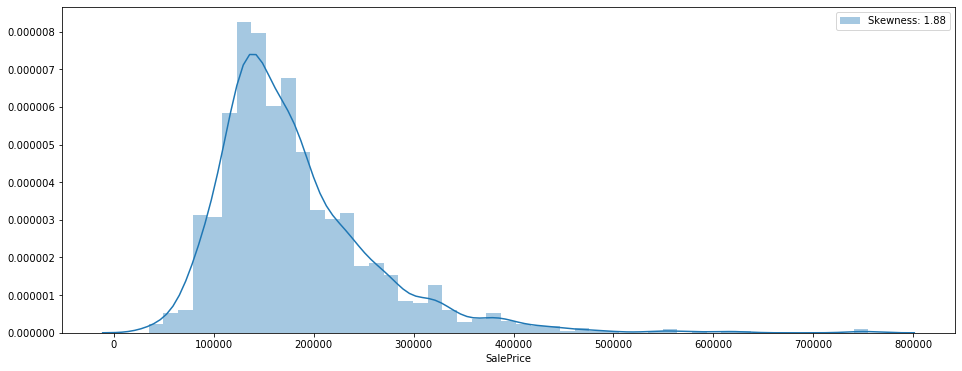

In [238]:
plt.figure(figsize=(16,6))
bar = sns.distplot(train_df['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(trbain_df['SalePrice'].skew())])b

### Correlation heatmap


(38.5, -0.5)

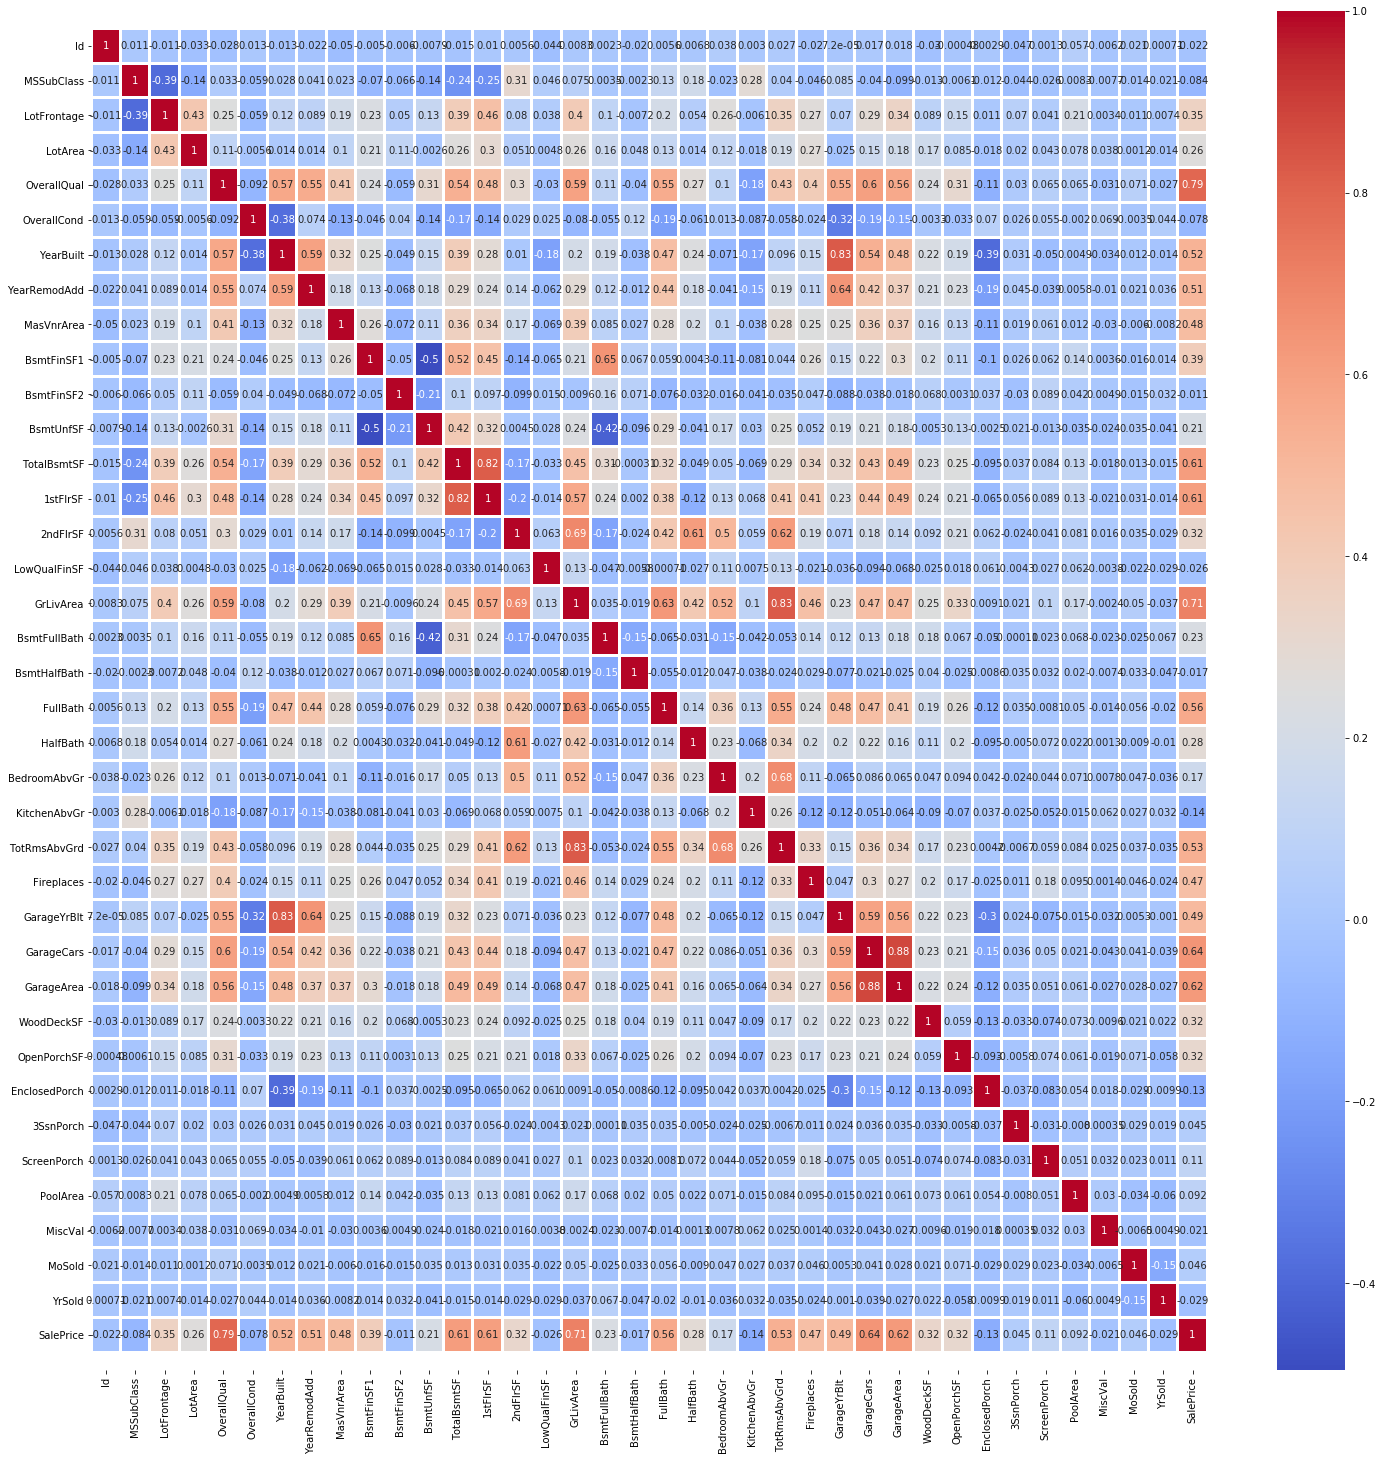

In [239]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(train_df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)